# Finance Fundamentals 
Portfolio allocation and sharpe ratio

In [ ]:
# Sharpe Ratio allows you to quantify the relationship between mean daily returns and
# standard deviation of daily returns

# Compare higher return portfolio with more risk to the lower risk(volitility) portfolio with lower returns 

# sharpe ratio = mean daily return / daily std. dev 

# daily: multiply k= sqrt(252) business days
# weekly = sqrt(52)
# monthly = sqrt12

In [1]:
import pandas as pd
import quandl

In [63]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [64]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end, api_key='ns6kUm2rY7s7sjNd3hZe')
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end, api_key='ns6kUm2rY7s7sjNd3hZe')
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end, api_key='ns6kUm2rY7s7sjNd3hZe')
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end, api_key='ns6kUm2rY7s7sjNd3hZe')

In [65]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [66]:
# Very first number in that column
aapl.iloc[0]['Adj. Close']

52.848786580038

In [67]:
# make new column and divide that adj close value from the very first adj close value
# This is to get cumulative returns normalized.. 
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [68]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [69]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [70]:
# 30% in apple
# 20% in cisco
# 40% in amazon
# 10% in ibm

In [71]:
#list(zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]))

In [72]:
# Mapping allocation to the dataframe
for stock_df , allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [73]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [74]:
# get position value or how much money we have in that out of 1 million dollars
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [75]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


# Make Portfolio Now

In [76]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'],ibm['Position Values'],amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals,axis=1)

In [77]:
portfolio_val.columns =['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [78]:
# See day by day position first day should be 1 million after that it should increase 
# summing across rows axis =1
portfolio_val['Total Pos']= portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

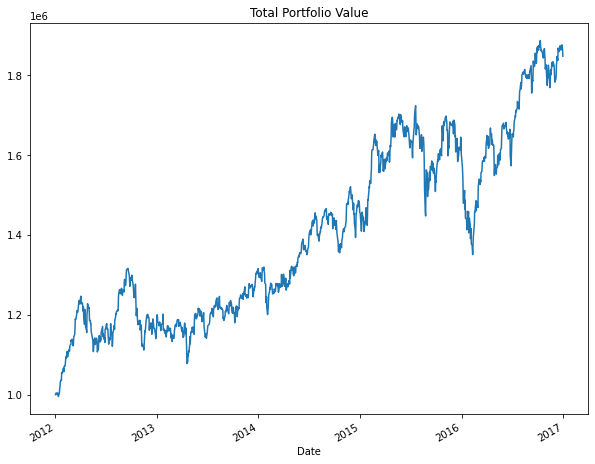

In [80]:
# If i invested 1 million dollars where would it be now
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

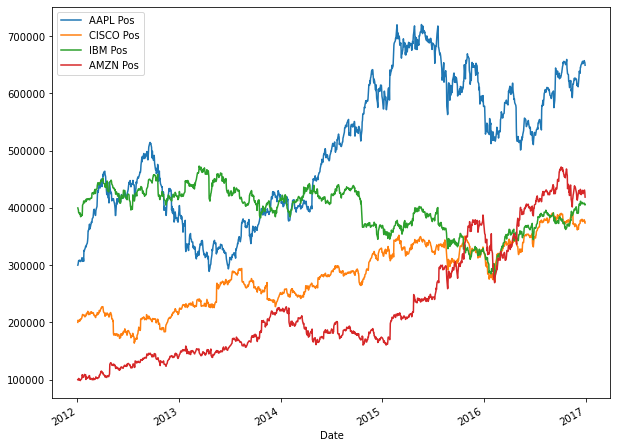

In [81]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize =(10,8))

# Portfolio Stats

In [82]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [83]:
# daily returns percent change
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [84]:
# MEAN DAILY RETURN
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [85]:
portfolio_val['Daily Return'].std() # standard deviation of daily returns

0.010568287769161718

<AxesSubplot:ylabel='Frequency'>

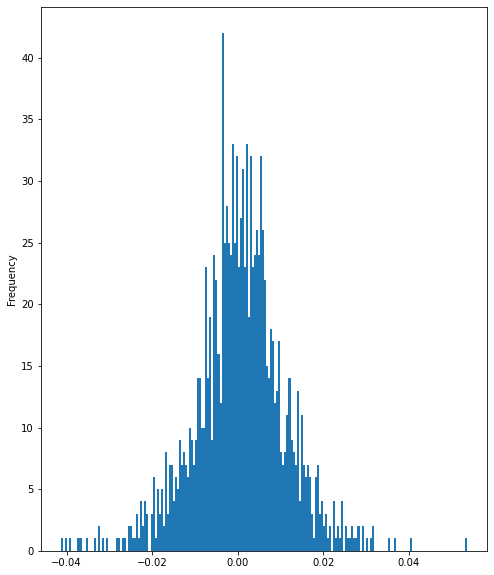

In [86]:
portfolio_val['Daily Return'].plot(kind='hist',bins=200,figsize=(8,10))

<AxesSubplot:ylabel='Density'>

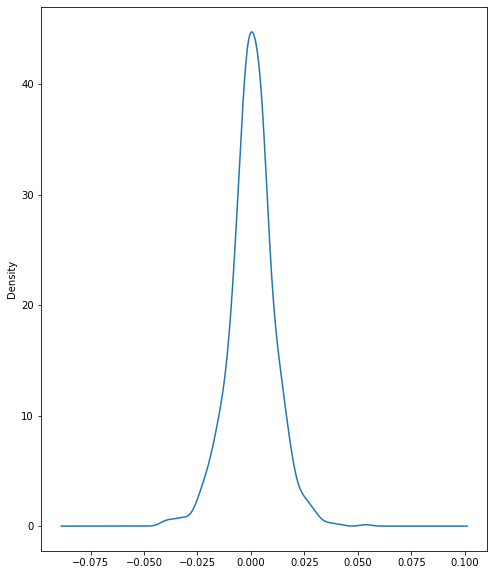

In [87]:
portfolio_val['Daily Return'].plot(kind='kde',figsize=(8,10))

In [88]:
# Overall percentage on return or (cumulative return not daily overall)
# take last portfolio position divide by first -1 times 100
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1)

In [89]:
cumulative_return # 172%

84.74285181665545

In [90]:
portfolio_val['Total Pos'][-1]
#portfolio_val['Total Pos'][0]

1847428.5181665544

In [91]:
# Calculate the Sharpe Ratio
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [92]:
SR # Was meant to be yearly metric so need to multiply by 252 business days

0.05149680662648092

In [99]:
# annualized sharpe ratio
# This is skewed because of other value
ASR = (252**.05) * SR

In [100]:
ASR # ratio of 1 is good, # ratio of 2 is great 3 is amazing 
# to allow investors to analys how much greater a return he or she is getting in relation 
# to the level of additional risk taken to genereate that return 

0.06789695939101113

# Portfolio Optimization
Monte Carlo Simulation

In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
aapl = pd.read_csv("AAPL_CLOSE",index_col='Date',parse_dates = True)
cisco = pd.read_csv("CISCO_CLOSE",index_col='Date',parse_dates = True)
ibm = pd.read_csv("IBM_CLOSE",index_col='Date',parse_dates = True)
amzn = pd.read_csv("AMZN_CLOSE",index_col='Date',parse_dates = True)

In [103]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [104]:
stocks.pct_change(1).mean() # daily mean returns

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [105]:
stocks.pct_change(1).corr() # correlation of each stock to eachother

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [106]:
# log vs arithmetic returns 
# helps normalize time series for some algorithms
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [107]:
# logrithmic return
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


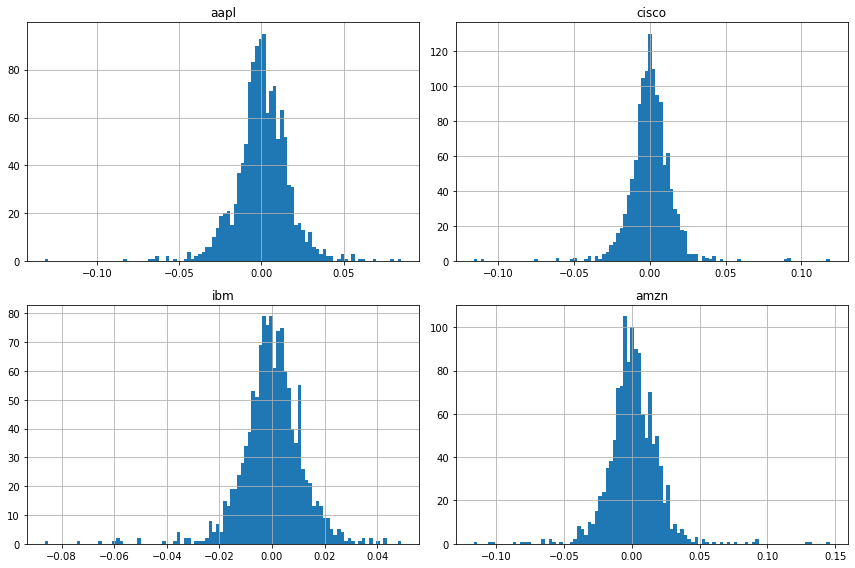

In [108]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [109]:
log_ret.mean() # logrithmic mean return

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [111]:
# pairwise covariance of logrithmic returns
log_ret.cov() *252 # 252 business days

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


# GET SHARP RATIO FOR PORTFOLIO WITH RANDOMLY GENERATED WEIGHTS

In [120]:
np.random.seed(101) # to get random weights
print(stocks.columns)

weights = np.array(np.random.random(4))

print("Random Weights: ")
print(weights)

print("Rebalance") 
weights = weights/np.sum(weights) # divide each weight by the sum for some reason... this makes everything equal to 1 in portfolio (gives percentage of sum duh)
print(weights)

# Expected Return DAILY
print('Expected Portfolio Return')
exp_ret = np.sum((log_ret.mean() * weights) * 252) # taking average log returns times weights and number 0f trading days and the sum of it is expected returns

# expected volitility DAILY 
print('Expected Volitility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))


# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR) 


Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights: 
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
Expected Volitility
Sharpe Ratio
0.8430831483926033


# Simulate Many Randomly Generated Portfolio

In [122]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    # get random weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights) # divide each weight by the sum for some reason... this makes everything equal to 1 in portfolio (gives percentage of sum duh)

    # save weights
    all_weights[ind,:] = weights
    
    # expcted Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252) # taking average log returns times weights and number 0f trading days and the sum of it is expected returns

    # expected volitilyt
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))

    #sharpe ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind] # 


In [123]:
sharpe_arr.max() # best sharpe ratio!!

1.0303260551271065

In [124]:
sharpe_arr.argmax() # where was the index of the max

1420

In [125]:
all_weights[1420,:] # This was the optimal allocation out of the 5000 allocations

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

Text(0, 0.5, 'Return')

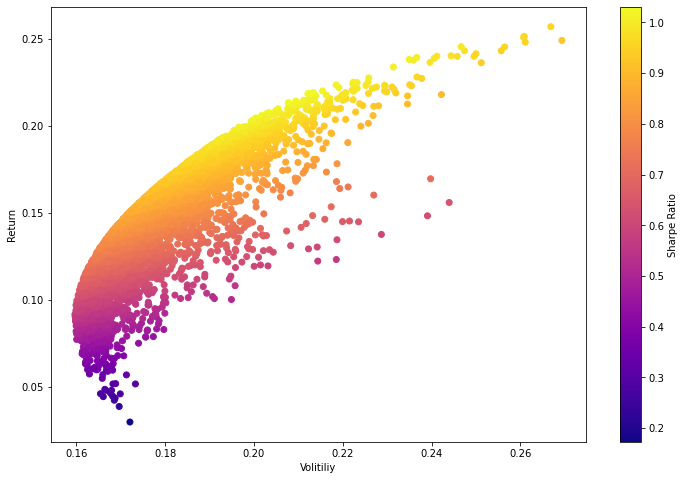

In [126]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volitiliy')
plt.ylabel("Return")


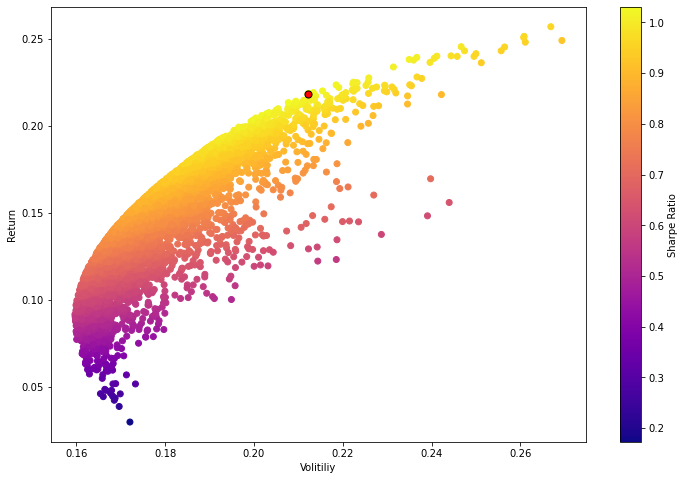

In [127]:
# Grab max sharpe ratio and plot the best allocation!!
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volitiliy')
plt.ylabel("Return")

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Find Optimal Portfolio Mathematically

In [128]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr]) # three parts to array

In [129]:
from scipy.optimize import minimize

In [131]:
#help(minimize) #documentation

In [132]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 # return just sharpe ratio from above function and returns negative sharpe ratio

In [133]:
def check_sum(weights):
    # return 0 if sum of weights is 1
    return np.sum(weights)-1 

In [134]:
# Constraints
# type equation function check sum
cons = ({'type':'eq','fun':check_sum})

In [135]:
bounds = ((0,1),(0,1),(0,1),(0,1)) # bouns musst be within 0 or 1

In [136]:
init_guess = [0.25,0.25,0.25,0.25] #Initial guess even portfolio

In [137]:
# SLSQP sequential leas square
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds = bounds,constraints=cons)

In [138]:
opt_results

     fun: -1.0307168703360547
     jac: array([ 5.64157963e-05,  4.18275595e-05,  3.39921698e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.20418982, 0.        , 0.52952041])

In [139]:
opt_results.x # The optimal weights for the portfolio

array([0.26628977, 0.20418982, 0.        , 0.52952041])

In [140]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

In [141]:
# making frontier plot returns dont go over 30% or .30 above in plot
frontier_y = np.linspace(0,0.3,100) # yaxis in frontier plot 

In [142]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1] 

In [144]:
frontier_volitility = []

# for every return on y axis what is best x axis or voliility i can get
for possible_return in frontier_y:
    cons =({'type':'eq','fun':check_sum}, # sums have to equal to 1
            {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return}) # for some weights get the first item (returns) and subtract possible return
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volitility.append(result['fun'])

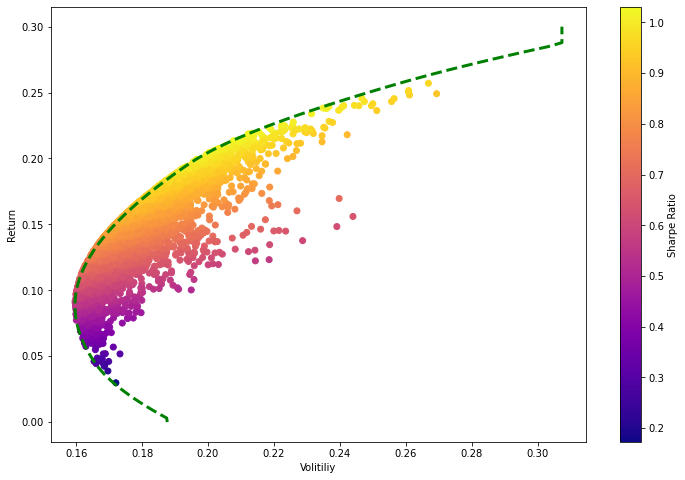

In [145]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volitiliy')
plt.ylabel("Return")

plt.plot(frontier_volitility,frontier_y,'g--',linewidth=3)